# Domain Proyek
___

Pada proyek ini, saya berfokus pada pengembangan model sistem rekomendasi jenis tanaman. Masalah pemilihan jenis tanaman yang tepat adalah isu krusial bagi petani karena penanaman yang tidak sesuai dengan kondisi lingkungan dan tanah yang dapat berdampak signifikan pada hasil panen dan pendapatan. Memahami dan merekomendasikan jenis tanaman yang optimal menjadi sangat penting untuk membantu petani membuat keputusan yang lebih baik dan merancang strategi penanaman yang efektif dan proaktif. Dengan mengidentifikasi tanaman yang paling cocok sejak dini, petani dapat meningkatkan produktivitas dan mengurangi risiko kerugian.

Masalah petani dalam memilih tanaman harus diselesaikan karena memiliki dampak finansial yang besar bagi petani dan ketahanan pangan secara keseluruhan. Ketidaksesuaian tanaman dengan kondisi lahan dapat mengurangi produktivitas, menurunkan pendapatan, serta meningkatkan biaya operasional akibat kegagalan panen atau kebutuhan perlakuan tambahan. Oleh karena itu, kemampuan untuk merekomendasikan tanaman yang tepat adalah kunci untuk keberlanjutan dan profitabilitas usaha pertanian.

Penyelesaian masalah ini dilakukan melalui pendekatan model machine learning. Dengan menganalisis data karakteristik lingkungan dan tanah, model machine learning dapat belajar pola-pola yang mengindikasikan kecocokan suatu jenis tanaman. Model ini akan memberikan kemampuan untuk :
- Rekomendasi optimal (Rekomendasi jenis tanaman yang paling optimal berdasarkan kondisi spesifik lahan)
- Peningkatan produktivitas (Membantu petani dalam memilih tanaman yang memiliki potensi hasil panen tertinggi di lahan mereka)
- Optimalisasi sumber daya (meminimalkan penggunaan sumber daya yang tidak perlu akibat penanaman yang tidak sesuai)

Riset menunjukkan bahwa sistem machine learning yang diusulkan dengan memanfaatkan data historis terkait kondisi iklim, sifat tanah, hasil panen, dan preferensi petani dapat memberikan rekomendasi tanaman yang dipersonalisasi. Studi ini mengevaluasi sembilan model Machine Learning, termasuk Logistic Regression, SVM, KNN, Decision Tree, Random Forest, Bagging, AdaBoost, Gradient Boosting, dan Extra Trees dengan Random Forest menunjukkan akurasi tertinggi yaitu sebesar 99,31% (Prity dkk., 2024).

Referensi :

Prity, F.S., Hasan, M.M., Saif, S.H. et al. Enhancing Agricultural Productivity: A Machine Learning Approach to Crop Recommendations. Hum-Cent Intell Syst 4, 497–510 (2024). https://doi.org/10.1007/s44230-024-00081-3

[(Sumber Referensi)](https://doi.org/10.1007/s44230-024-00081-3)


## Business Understanding
---
Pada bagian ini, saya akan menjelaskan proses klarifikasi masalah, termasuk pernyataan masalah, tujuan, dan solusi yang diusulkan.

### Problem Statement
---

1. Bagaimana petani dapat secara efektif mencocokkan kebutuhan spesifik tanaman dengan kondisi lingkungan (N, P, K, suhu, kelembaban, pH, dan curah hujan) mereka, mengingat kurangnya metode atau alat yang terstruktur untuk melakukan analisis komparatif ini?
2. Bagaimana dampak negatif dari pemilihan tanaman yang tidak optimal (seperti pemborosan sumber daya dan potensi penurunan hasil panen) dapat dikurangi atau dihindari oleh petani?

### Goals
---

1. Membangun sistem yang menyediakan metode terstruktur dan berbasis data untuk mencocokkan kebutuhan spesifik tanaman dengan parameter lingkungan, sehingga memudahkan petani dalam mengidentifikasi tanaman yang paling sesuai.
2. Menyediakan rekomendasi tanaman yang akurat dan relevan untuk memandu petani, yang pada akhirnya dapat mengurangi pemborosan sumber daya dan meningkatkan potensi hasil panen melalui pemilihan tanaman yang optimal.

### Solution Statements
---

1. Membangun model rekomendasi berbasis konten untuk menyarankan jenis tanaman yang sesuai.
2. Melakukan analisis fitur dari dataset untuk mengetahui fitur-fitur lingkungan mana yang paling signifikan dalam menentukan rekomendasi tanaman, serta menghitung rata-rata karakteristik untuk setiap jenis tanaman.
3. Mengembangkan algoritma rekomendasi yang menggunakan metrik kemiripan (misalnya, cosine similarity) antara kondisi lingkungan pengguna dan karakteristik rata-rata tanaman untuk menghasilkan daftar rekomendasi.
4. Mengevaluasi performa model rekomendasi menggunakan metrik yang relevan seperti Precision@k, Recall@k, dan NDCG (Normalized Discounted Cumulative Gain) untuk mengukur seberapa efektif sistem dalam menyajikan rekomendasi yang akurat dan relevan.

## Data Understanding
---

Dataset "Crop Recommendation" berisi informasi historis parameter lingkungan dan tanah yang terkait dengan jenis tanaman yang cocok untuk kondisi tersebut. Sumber data didapatkan dari tautan berikut: [(Sumber Dataset)](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset). Dataset ini mencakup berbagai atribut seperti kadar Nitrogen (N), Fosfor (P), Kalium (K) dalam tanah, suhu (temperature), kelembaban (humidity), pH tanah (ph), dan curah hujan (rainfall). Target variabelnya adalah 'label' (jenis tanaman yang direkomendasikan).

Namun karena model yang akan dibangun adalah model Content Based Filtering, maka dataset yang digunakan harus diubah terlebih dahulu menjadi profil fitur untuk setiap jenis tanaman (misalnya berdasarkan kebutuhan nutrisi N, P, K, suhu optimal, dll.) dan kemudian merekomendasikan tanaman yang paling mirip profilnya dengan kondisi input atau tanaman referensi.

# Data Loading
---

## Import Library
___

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [57]:
# Memuat dataset
df = pd.read_csv("https://raw.githubusercontent.com/Marsello-or/Submission2_MachineLearningTerapan/refs/heads/main/Crop_recommendation.csv")

In [58]:
# Membuat profil untuk setiap tanaman dengan mengambil nilai rata-rata dari fiturnya
crop_profiles = df.groupby('label').mean().reset_index()

In [59]:
crop_profiles.head()

,label,N,P,K,temperature,humidity,ph,rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646


---
Data sudah diubah ke dalam format profil fitur untuk setiap jenis tanaman (misalnya berdasarkan kebutuhan nutrisi N, P, K, suhu optimal, dll.) agar kemudian dapat membangun model rekomendasi tanaman yang paling mirip profilnya dengan kondisi input atau tanaman referensi.

# Exploratory Data Analysis
___
Proses analisis data yang ada di dalam dataset, proses eksplorasi dilakukan untuk dapat melihat persebaran dan karakteristik data yang akan digunakan untuk dasar pembuatan model.

In [60]:
crop_profiles.shape

(22, 8)

In [61]:
crop_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   label        22 non-null     object 
 1   N            22 non-null     float64
 2   P            22 non-null     float64
 3   K            22 non-null     float64
 4   temperature  22 non-null     float64
 5   humidity     22 non-null     float64
 6   ph           22 non-null     float64
 7   rainfall     22 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.5+ KB


---
Output di atas menunjukkan bahwa dataset memiliki 22 data profil tanaman dan 8 kolom fitur untuk masing-masing profil tanaman.
- Terdapat 7 data float 64.
- Terdapat 1 data object (label jenis tanaman).

In [62]:
crop_profiles.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,35.767511,32.862796,51.729636,3.650425,22.411186,0.480316,51.964501
min,18.770000,16.550000,10.010000,18.872847,16.860439,5.749411,24.689952
25%,20.762500,27.570000,19.915000,22.996627,60.353581,5.994404,68.316071
50%,31.600000,47.795000,30.265000,25.249426,80.100798,6.462475,99.665748
75%,79.517500,67.682500,50.047500,28.081631,88.969121,6.820958,135.134574
max,117.770000,134.220000,200.110000,33.723859,94.844272,7.336957,236.181114


---
Dilakukan identifikasi karakeristik secara statistik dengan menggunakan fungsi `describe`.
- `count` adalah jumlah sampel pada dataset yang digunakan
- `mean` adalah nilai rata-rata
- `std` adalah standar deviasi
- `min` adalah nilai minimum yang ada pada masing-masing kolom data
- `25%` menunjukkan kuartil pertama
- `50%` menunjukkan kuartil kedua
- `75%` menunjukkan kuartil ketiga
- `Max` adalah nilai maksimum pada kolom

* `N` (Nitrogen): Rasio kandungan nitrogen antara 18.77-117.77.
* `P` (Phosphorus): Rasio kandungan Phosphorus antara 16.55-134.22.
* `K` (Potassium): Rasio kandungan Potassium antara 10.01-200.11.
* `temperature` (Suhu): Berkisar antara 18.87-33.72 C.
* `humidity` (Kelembaban): Berkisar antara 16.86-94.84 %.
* `ph` (pH Tanah): Berkisar antara 5.74-7.33.
* `rainfall` (Curah Hujan): Berkisar antara 24.68-236.181 mm.

### Checking Missing and Duplicated Value
---

In [63]:
print("Total Data Teduplikasi :", crop_profiles.duplicated().sum())

Total Data Teduplikasi : 0


In [64]:
crop_profiles.isnull().sum()

,0
label,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0


---
Terlihat dari fungsi analisis di atas bahwa dataset tidak memiliki data duplikat dan *missing value*. Oleh karena itu, proses dapat dilanjutkan kepada analisis dan proses visualisasi data.


### Boxplot Visualization

Visualisasi boxplot dari data numerical yang anda
___

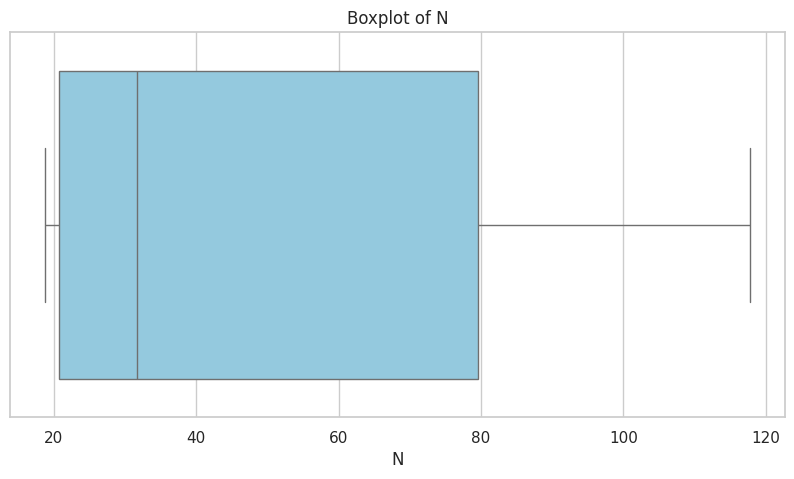

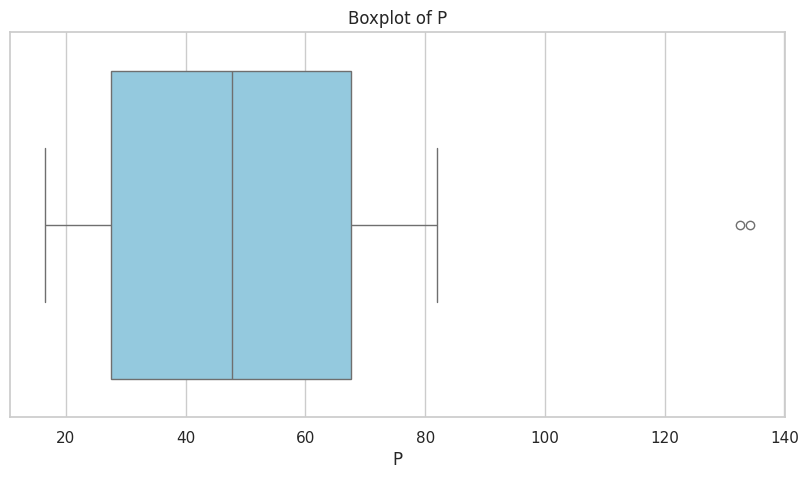

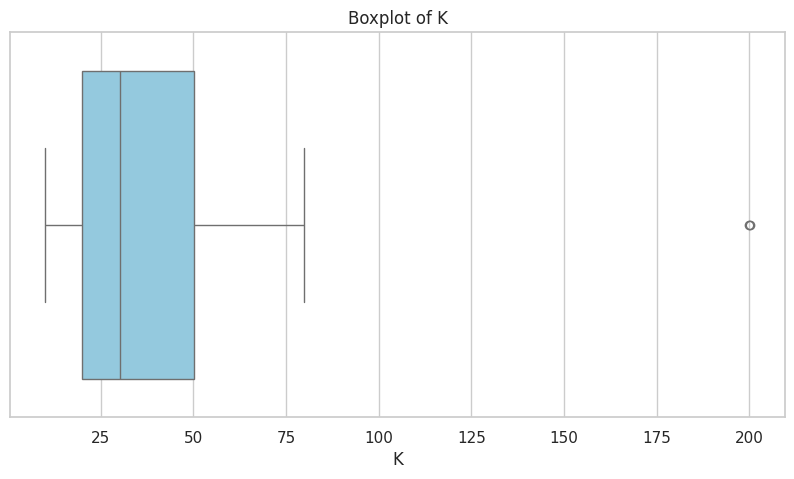

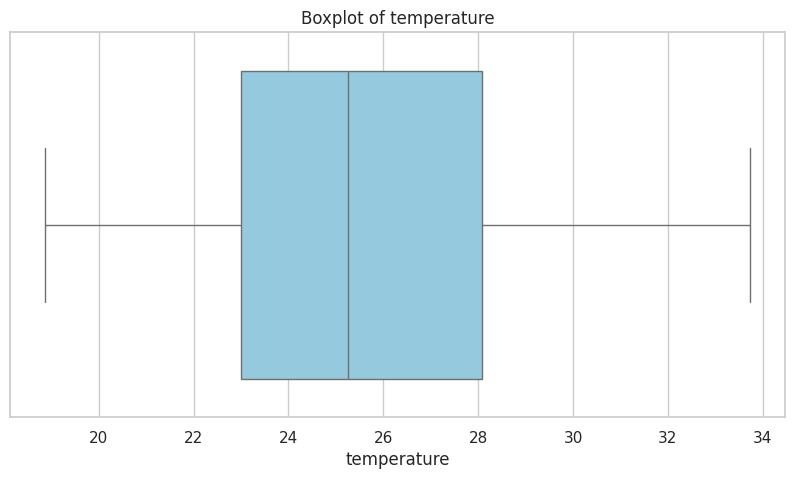

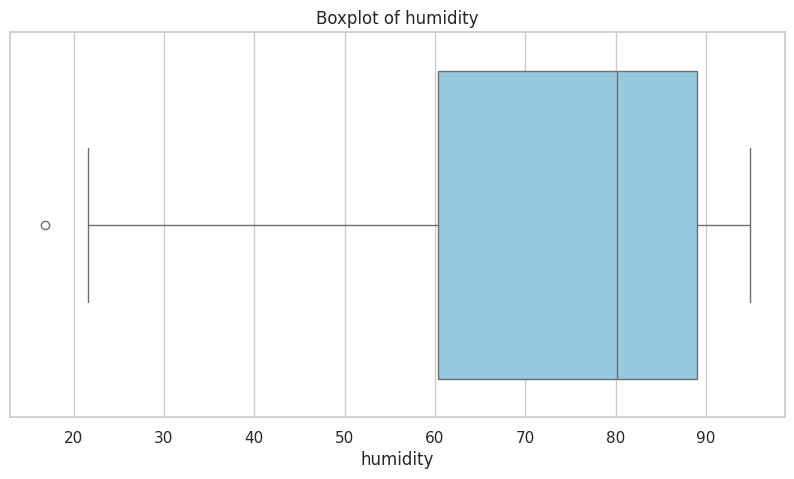

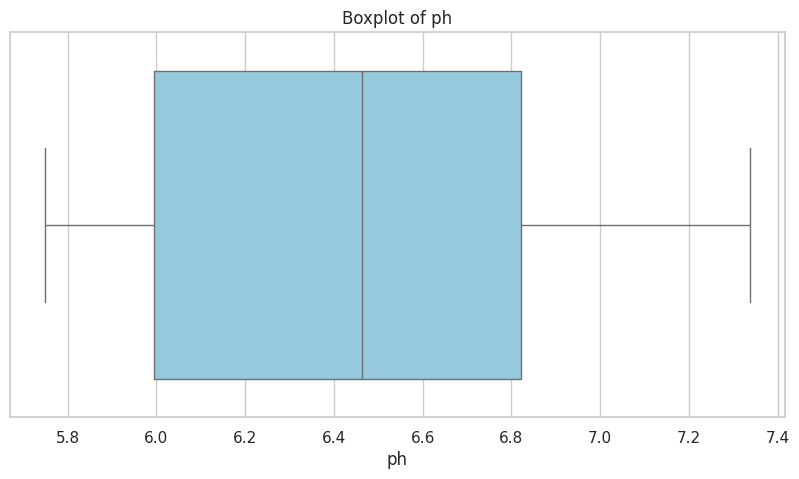

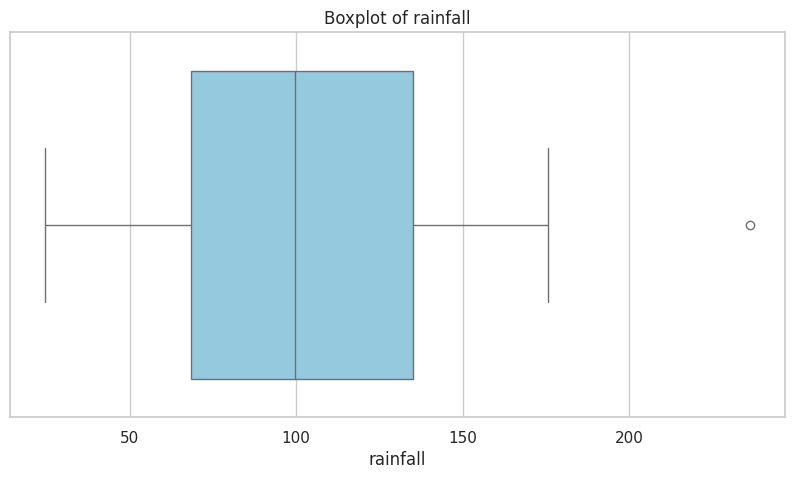

In [65]:
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for num in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=crop_profiles, x=num, color='skyblue')
    plt.title(f'Boxplot of {num}')
    plt.xlabel(num)
    plt.show()

Untuk deskripsi dan detail box plot dapat dilihat sebagai berikut:
-   `N` (Nitrogen): Distribusi yang relatif tersebar dengan rentang data dari 20-80 unit kandungan Nitrogen, penyebarannya cukup lebar.
-   `P` (Phosphorus): Menunjukkan distribusi yang cukup merata dengan sedikit outlier, data terbentang dari 30-70 unit kandungan Phosphorus.
-   `K` (Potassium): Terlihat konsentrasi nilai pada 20-50 unit kandungan Potassium, dengan sedikit outlier di bagian atas.
-   `temperature`: Distribusi suhu yang cukup simetris dengan rentang 23-28 C.
-   `humidity`: Terlihat ada outlier pada kelembaban yang sangat rendah, dengan rentang data 60-90%.
-   `ph`: Distribusi pH tanah yang cenderung simetris pada nilai pH normal.
-   `rainfall`: Menunjukkan kesimetrisan dengan data outlier di bagian atas dengan kecerendungan right skewness.

## Exploratory Data Analysis - Univariate
---

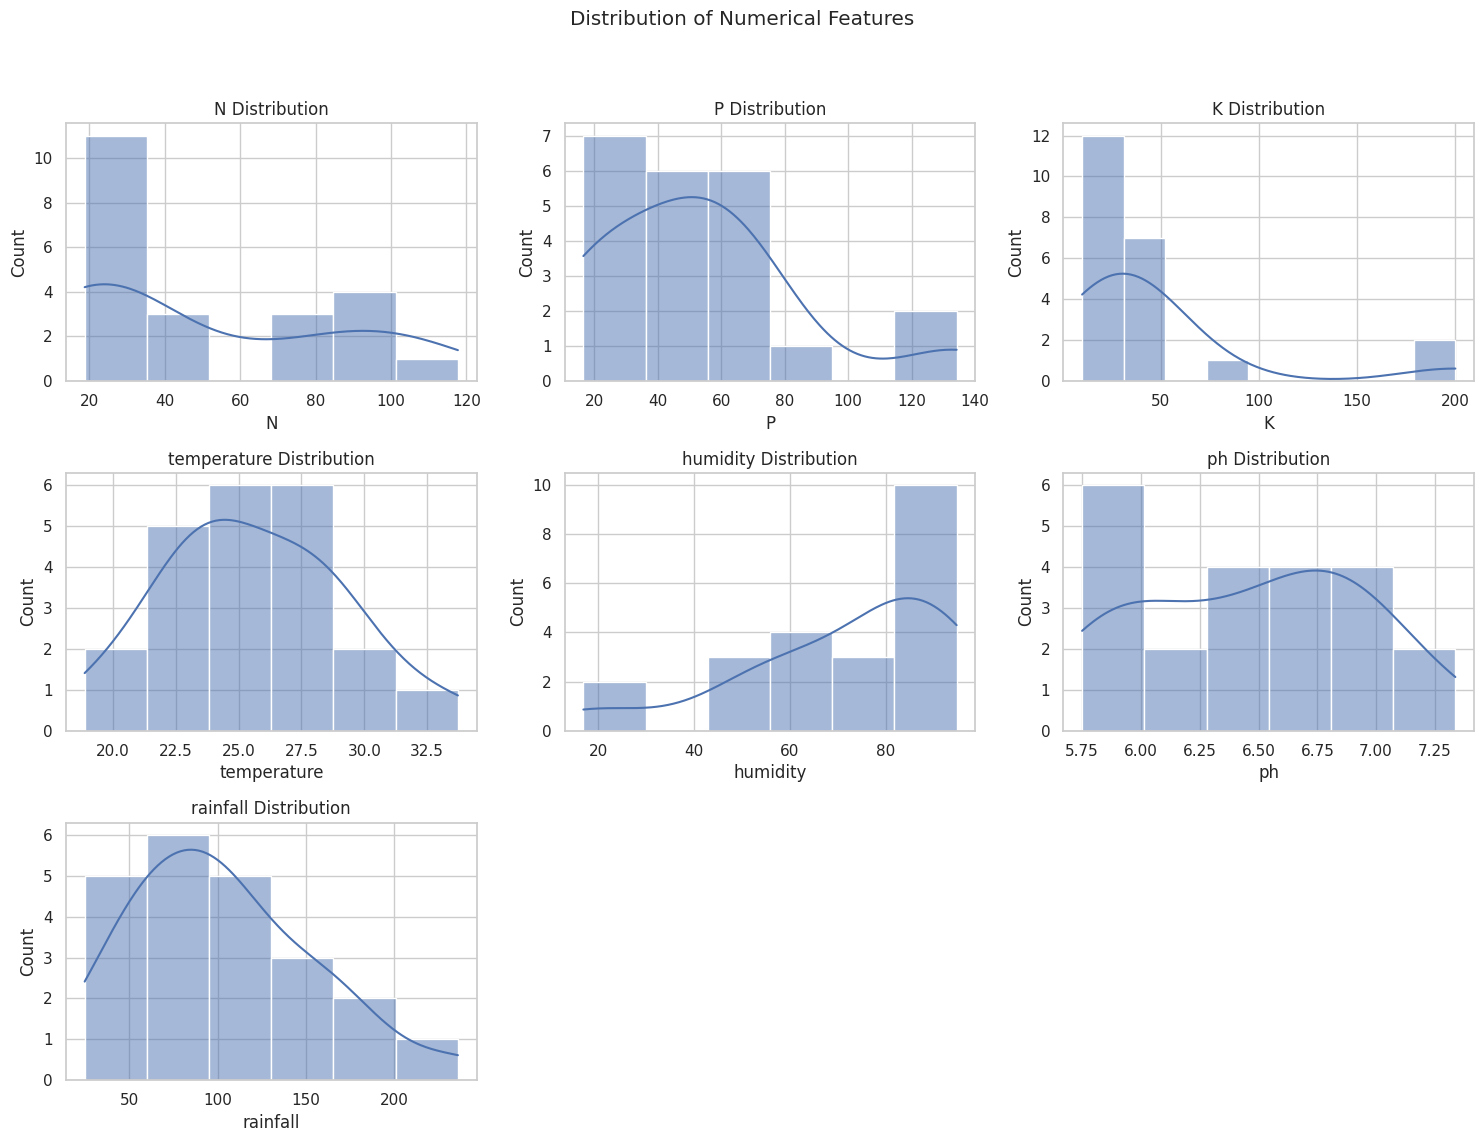

In [66]:
# Univariate Analysis - Numerical Feature
numerical_features_to_plot_dist = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

sns.set(style="whitegrid")
n_cols = 3
n_rows = (len(numerical_features_to_plot_dist) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
fig.suptitle('Distribution of Numerical Features')

axes = axes.flatten()

# Loop through the numerical features and plot them
for i, num in enumerate(numerical_features_to_plot_dist):
    sns.histplot(crop_profiles[num], kde=True, ax=axes[i])
    axes[i].set_title(f'{num} Distribution')

# Hide any unused subplots
for j in range(len(numerical_features_to_plot_dist), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

___
Berdasarkan hasil analisis dari plot distribusi *feature numerical*:
-   `N`, `P`, `K`, `temperature`, `humidity`, `ph`, `rainfall`: Sebagian besar fitur numerik menunjukkan distribusi yang bervariasi, beberapa mendekati normal, beberapa sedikit miring. Ini memberikan gambaran umum tentang rentang dan konsentrasi nilai pada setiap fitur.
___

### Univariate Analysis - Categorical Feature

Frequency counts for 'label' column
label
apple          1
banana         1
blackgram      1
chickpea       1
coconut        1
coffee         1
cotton         1
grapes         1
jute           1
kidneybeans    1
lentil         1
maize          1
mango          1
mothbeans      1
mungbean       1
muskmelon      1
orange         1
papaya         1
pigeonpeas     1
pomegranate    1
rice           1
watermelon     1
Name: count, dtype: int64


Proportions/Percentages for 'label' column:
label
apple          4.545455
banana         4.545455
blackgram      4.545455
chickpea       4.545455
coconut        4.545455
coffee         4.545455
cotton         4.545455
grapes         4.545455
jute           4.545455
kidneybeans    4.545455
lentil         4.545455
maize          4.545455
mango          4.545455
mothbeans      4.545455
mungbean       4.545455
muskmelon      4.545455
orange         4.545455
papaya         4.545455
pigeonpeas     4.545455
pomegranate    4.545455
rice           4.545455
wa

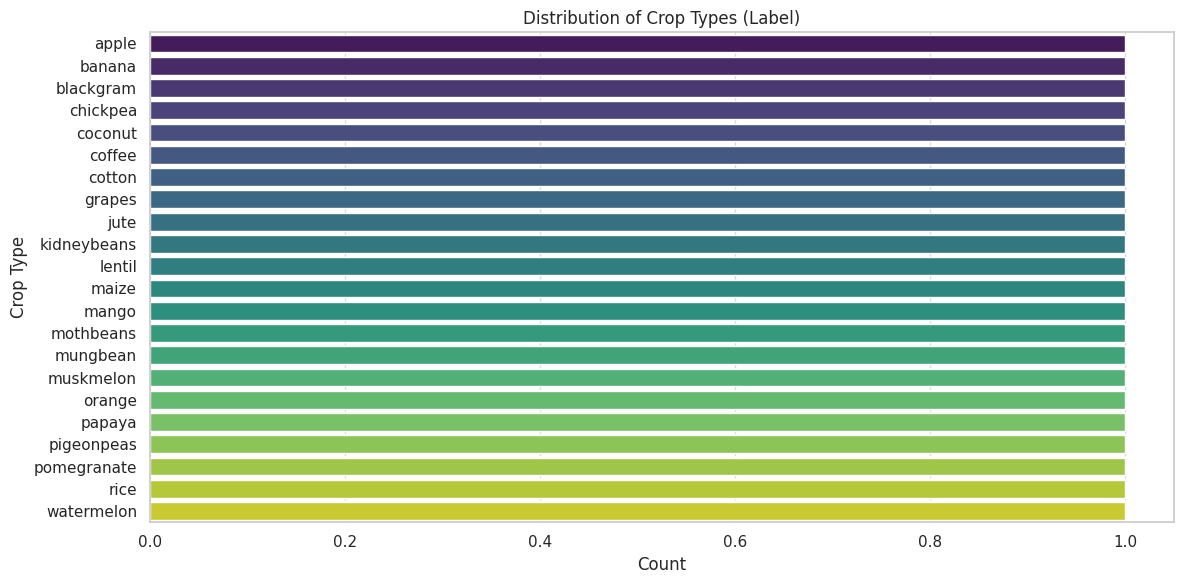


Univariate analysis for the 'label' (categorical) feature has been performed.


In [67]:
# Univariate Analysis for 'label' (Categorical Feature)

# 1. Frequency Counts
print("Frequency counts for 'label' column")
label_counts = crop_profiles['label'].value_counts()
print(label_counts)
print("\n" + "="*50 + "\n")

# 2. Proportions/Percentages
print("Proportions/Percentages for 'label' column:")
label_percentages = crop_profiles['label'].value_counts(normalize=True) * 100
print(label_percentages)
print("\n" + "="*50 + "\n")

# 3. Visualization: Bar plot
plt.figure(figsize=(12, 6))
sns.countplot(data=crop_profiles, y='label', order=label_counts.index, palette='viridis')
plt.title('Distribution of Crop Types (Label)')
plt.xlabel('Count')
plt.ylabel('Crop Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nUnivariate analysis for the 'label' (categorical) feature has been performed.")

---
Berdasarkan grafik fitur kategorikal yang telah dibuat, berikut adalah deskripsinya:

**Label Distribution (Distribusi Jenis Tanaman):**
- Grafik ini menunjukkan jumlah sampel untuk setiap jenis tanaman. Terlihat bahwa setiap jenis tanaman (label) memiliki jumlah sampel yang seimbang (masing-masing 1 sampel profil untuk setiap tanaman), mengindikasikan dataset yang seimbang untuk setiap tanamannya dan tidak ada duplikat.

# EDA - Multivariate Analysis
---

In [68]:
data_for_multivariate_analysis = crop_profiles.copy()

# --- Fitur numerik yang akan digunakan dalam korelasi dan scatter plot ---
numerical_features_for_corr_plot = [
    'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'
]

## Analisis Pair Plot dari setiap fitur numerik profil tanaman
---


Membuat pair plot untuk kolom numerik: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


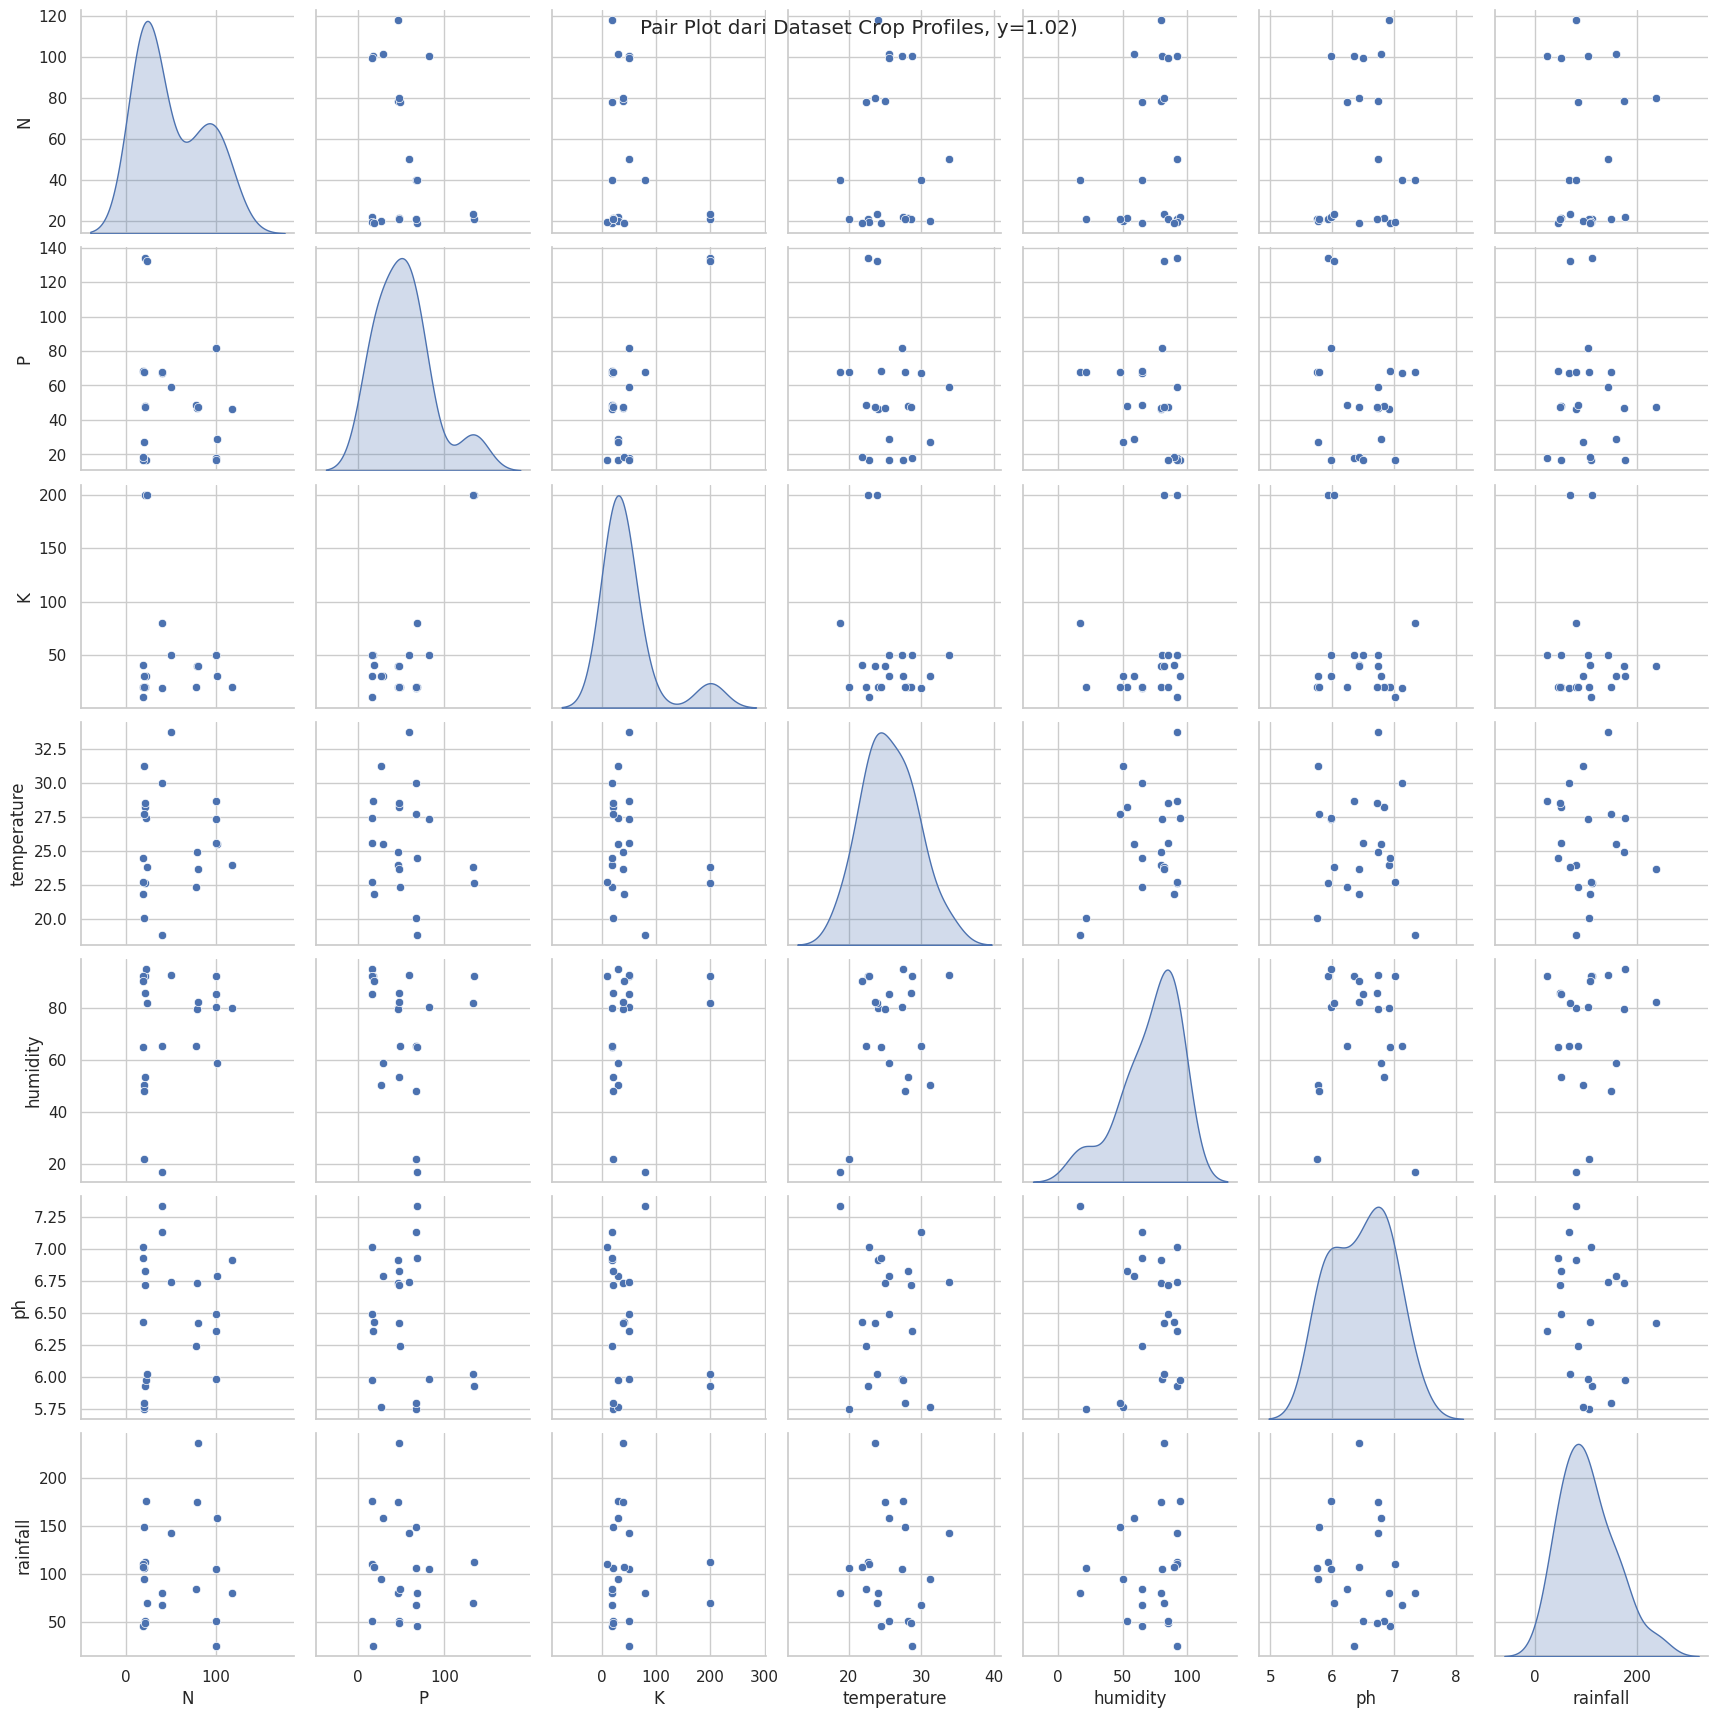


Selesai.


In [69]:
# Identifikasi kolom numerik untuk pair plot
# Pair plot hanya bisa dibuat untuk kolom numerik.
# Kita akan mencoba mengecualikan kolom non-numerik secara otomatis.
numeric_cols = data_for_multivariate_analysis.select_dtypes(include=['number']).columns

if len(numeric_cols) < 2:
    print("\nDataset tidak memiliki cukup kolom numerik (minimal 2) untuk membuat pair plot.")
    print("Kolom numerik yang ditemukan:", numeric_cols.tolist())
else:
    print(f"\nMembuat pair plot untuk kolom numerik: {numeric_cols.tolist()}")

    # Buat Pair Plot
    # Jika ada kolom kategorikal yang ingin Anda gunakan sebagai 'hue' (pewarna),
    # Anda bisa menambahkannya. Misalnya, jika ada kolom 'kategori_produk':
    # Untuk saat ini, kita akan membuat tanpa 'hue' kecuali Anda spesifikasikan.
    sns.pairplot(data_for_multivariate_analysis[numeric_cols], diag_kind='kde')

    # Tambahkan judul dan tampilkan plot
    plt.suptitle('Pair Plot dari Dataset Crop Profiles, y=1.02)')
    plt.show()

print("\nSelesai.")

### Analisis Hasil Pair Plots (Multivariate Analysis)

---
Berdasarkan *pair plot* yang menunjukkan hubungan antara fitur numerik:

- N, P, dan K (unsur hara tanah): Distribusi tidak normal; terlihat multimodal atau skewed (condong ke kiri/kanan).
- Banyak nilai ekstrem atau outlier, terutama pada K.
- Temperature: Distribusi mendekati normal dengan sedikit variasi; sebagian besar data berada pada rentang 20–30°C.
- Humidity: Distribusi cukup terkonsentrasi antara 40%–80%.
- pH: Nilainya terkonsentrasi antara 5.5–7.5, menunjukkan kebanyakan tanah bersifat netral hingga sedikit asam.
- Rainfall: Tersebar lebih merata dibanding variabel lain, dengan beberapa
outlier di atas 150 mm.

Hubungan antar Variabel:
 - N, P, dan K satu sama lain : Tidak ada korelasi linier yang kuat terlihat; penyebaran data tampak acak.
 - Temperature vs. Humidity: Tidak menunjukkan korelasi negatif kuat seperti yang biasanya diharapkan (di mana suhu tinggi → kelembapan turun), artinya faktor lain bisa lebih dominan.
 - pH vs Nutrisi (N, P, K):Hubungan antara pH dan N, P, K juga tidak tampak jelas secara linier, kemungkinan hubungan non-linier atau ada pengaruh dari jenis tanaman/jenis tanah.
 - Rainfall: Tidak menunjukkan korelasi kuat terhadap variabel lain secara visual.

## Correlation Heatmap
---


Membuat heatmap korelasi untuk kolom numerik: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


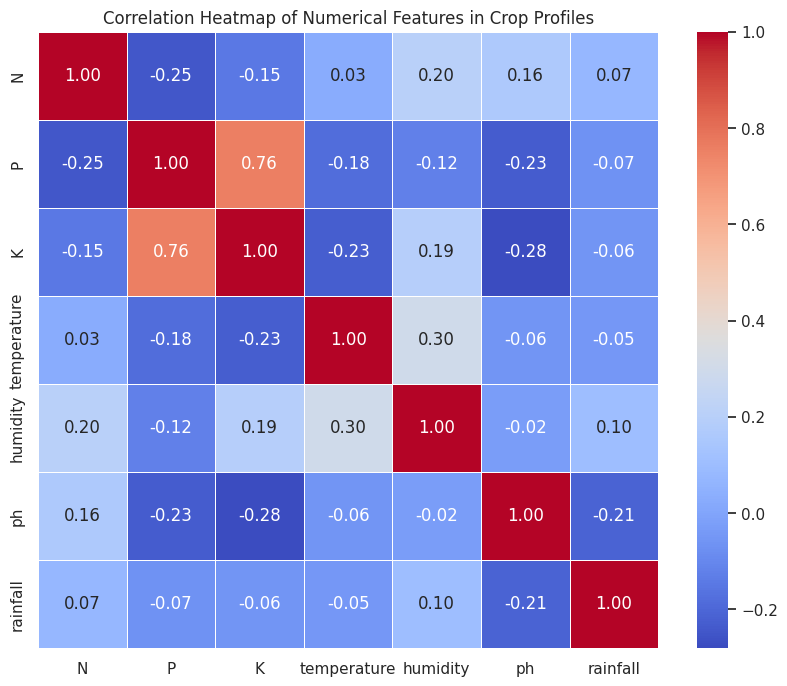


Selesai.


In [70]:
# Pilih hanya kolom numerik untuk heatmap
numerical_features_for_heatmap = data_for_multivariate_analysis.select_dtypes(include=np.number).columns.tolist()

if not numerical_features_for_heatmap:
    print("\nDataset tidak memiliki kolom numerik untuk membuat heatmap korelasi.")
else:
    print(f"\nMembuat heatmap korelasi untuk kolom numerik: {numerical_features_for_heatmap}")

    # Hitung matriks korelasi
    correlation_matrix = data_for_multivariate_analysis[numerical_features_for_heatmap].corr()

    # Buat heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Heatmap of Numerical Features in Crop Profiles')
    plt.show()

print("\nSelesai.")

### Interpretasi Umum Heatmap:
---

* **Warna Merah Cerah:** Menunjukkan korelasi positif yang kuat (mendekati +1).
* **Warna Biru Cerah:** Menunjukkan korelasi negatif yang kuat (mendekati -1).
* **Warna Pucat/Putih (mendekati 0):** Menunjukkan korelasi yang sangat lemah atau tidak ada korelasi linier.

### Analisis Korelasi Antar Fitur:
---

### Analisis Heatmap Korelasi Variabel Numerik
- Korelasi Positif Kuat
  - Fosfor (P) dan Kalium (K): 0,76 - Ini adalah korelasi positif terkuat dalam dataset, menunjukkan bahwa kedua unsur hara ini sering muncul bersamaan dalam tanah, kemungkinan karena sumber yang sama atau proses tanah yang mempengaruhi kedua elemen ini.
  - Suhu dan Kelembaban: 0,30 - Hubungan positif yang moderat, yang mungkin tampak berlawanan dengan intuisi tetapi bisa mencerminkan pola iklim regional dimana daerah yang lebih hangat juga memiliki tingkat kelembaban yang lebih tinggi.

- Korelasi Negatif Kuat
  - Nitrogen (N) dan Fosfor (P): -0,25 - Hubungan negatif yang notable, menunjukkan bahwa unsur hara ini mungkin berkompetisi atau dipengaruhi oleh kondisi tanah yang berlawanan.
  - Kalium (K) dan pH: -0,28 - Menunjukkan bahwa kadar kalium yang tinggi cenderung terjadi pada tanah yang lebih asam (pH rendah).
  - Fosfor (P) dan pH: -0,23 - Pola serupa dengan kalium, menunjukkan kondisi asam mungkin mendukung ketersediaan fosfor.

### Pengamatan Menarik

- pH menunjukkan korelasi negatif dengan sebagian besar unsur hara (N, P, K), menunjukkan sampel tanah mungkin berasal dari lingkungan dimana kondisi asam mendukung ketersediaan hara
- Curah hujan tampak relatif independen terhadap variabel lainnya, dengan korelasi yang lemah secara keseluruhan
- Hubungan suhu umumnya lemah kecuali dengan kelembaban, menunjukkan mungkin bukan faktor utama yang mempengaruhi sifat tanah yang diukur

Pola ini menunjukkan data mungkin berasal dari tanah pertanian atau hutan dimana dinamika hara sangat dipengaruhi oleh tingkat pH, dengan fosfor dan kalium menunjukkan perilaku yang saling terkait.

### Kesimpulan dari Heatmap:
---

* Fosfor dan Kalium sangat terkait (0,76) - Kedua unsur hara ini berperilaku serupa dalam tanah, kemungkinan karena proses biogeokimia yang sama atau sumber yang serupa.
* pH adalah faktor kunci - pH tanah memiliki pengaruh negatif terhadap ketersediaan unsur hara utama (N, P, K), menunjukkan bahwa tanah yang lebih asam cenderung memiliki konsentrasi hara yang lebih tinggi.
* Nitrogen berperilaku berbeda - Nitrogen menunjukkan pola korelasi yang berbeda dibanding P dan K, terutama hubungan negatif dengan fosfor, mengindikasikan dinamika yang kompleks antar unsur hara.

# Data Preparation
Teknik yang digunakan:
-   Penanganan Missing Values: Memastikan tidak ada nilai yang hilang.
-   Pemisahan Fitur dan Target: Membagi data menjadi variabel independen (fitur) dan dependen (target).
-   Train-test split data: Data dibagi menjadi 80% Train dan 20% Test.
-   Feature Scaling: Melakukan penskalaan data numerik.
---

### Penanganan Missing Values
---

In [71]:
print("Cek Missing Values sebelum penanganan:")
print(crop_profiles.isnull().sum())
if crop_profiles.isnull().sum().sum() == 0:
    print("Tidak ada missing values dalam dataset, tidak perlu penanganan khusus.")
else:
    print("Missing values telah diidentifikasi dan perlu ditangani jika ada.")

Cek Missing Values sebelum penanganan:
label          0
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64
Tidak ada missing values dalam dataset, tidak perlu penanganan khusus.


---
Pada dataset ini, tidak ditemukan adanya *missing value*, sehingga tidak diperlukan penanganan khusus pada tahap ini.

# Data Modeling
---

## Feature Engineering
---

### Define feature names

In [72]:
feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

### Initialize encoders and scalers

In [73]:
label_encoder = LabelEncoder()
scaler = StandardScaler()

### Encode crop Labels untuk jadi bentuk numerik

In [74]:
crop_profiles['crop_encoded'] = label_encoder.fit_transform(crop_profiles['label'])
print("\nCrop encoding mapping:")
for i, crop in enumerate(label_encoder.classes_):
    print(f"{i}: {crop}")


Crop encoding mapping:
0: apple
1: banana
2: blackgram
3: chickpea
4: coconut
5: coffee
6: cotton
7: grapes
8: jute
9: kidneybeans
10: lentil
11: maize
12: mango
13: mothbeans
14: mungbean
15: muskmelon
16: orange
17: papaya
18: pigeonpeas
19: pomegranate
20: rice
21: watermelon


### Scale features to normalize different units (N, P, K vs temperature, etc.)
---

In [75]:
features = crop_profiles[feature_names].values
features_scaled = scaler.fit_transform(features)
print(f"\nFeatures scaled using StandardScaler")
print(f"Original features shape: {features.shape}")
print(f"Scaled features shape: {features_scaled.shape}")


Features scaled using StandardScaler
Original features shape: (22, 7)
Scaled features shape: (22, 7)


# Modeling

# Konsep dan Kelebihan/Kekurangan Neural Network dalam Sistem Rekomendasi
Neural Network menawarkan pendekatan yang sangat kuat dan fleksibel untuk sistem rekomendasi, terutama dalam skenario yang lebih kompleks.

## Apa itu Neural Network?
Neural Network adalah model komputasi yang terinspirasi oleh struktur dan fungsi otak manusia. Model ini terdiri dari lapisan-lapisan (layers) node (neuron) yang saling terhubung. Setiap neuron menerima input, memprosesnya dengan fungsi aktivasi, dan mengirimkan output ke neuron di lapisan berikutnya. Kemampuan Neural Network untuk belajar pola non-linier dari data menjadikannya sangat efektif untuk tugas-tugas kompleks seperti sistem rekomendasi. Lapisan-lapisan yang umum ditemukan seperti Embedding (untuk mengubah ID menjadi vektor padat), Dot (untuk menghitung kemiripan antar vektor), dan Dense (untuk mempelajari pola kompleks dan melakukan transformasi data) adalah bagian fundamental dari arsitektur ini.

## Kelebihan Neural Network dalam Sistem Rekomendasi:

- Kemampuan Belajar Pola Kompleks Non-Linier: Neural Network dapat menangkap hubungan yang sangat kompleks dan non-linier dalam data interaksi pengguna-item yang mungkin tidak dapat ditangkap oleh metode linier atau berbasis kemiripan sederhana. Ini memungkinkan model untuk menemukan preferensi tersembunyi yang lebih dalam.
- Pembuatan Representasi Fitur Otomatis (Feature Learning): Dengan lapisan embedding dan dense, Neural Network dapat secara otomatis belajar representasi (embeddings) yang kaya dan bermakna dari pengguna dan item dari data mentah. Hal ini mengurangi kebutuhan akan rekayasa fitur manual yang ekstensif.
- Menangani Data Sparse: Model berbasis Neural Network, terutama yang menggunakan embedding, dapat bekerja dengan baik pada dataset yang sangat sparse (banyak nilai kosong) seperti yang umum dijumpai dalam data interaksi pengguna-item.
- Fleksibilitas Arsitektur: Arsitektur Neural Network dapat dirancang dengan sangat fleksibel (jumlah lapisan, jumlah neuron per lapisan, jenis aktivasi) untuk menyesuaikan dengan kompleksitas data dan tujuan rekomendasi.
- Potensi untuk Menggabungkan Berbagai Sumber Data (Hybrid Systems): Neural Network sangat cocok untuk membangun sistem rekomendasi hibrida, di mana informasi dari data konten (fitur item), data pengguna, dan data interaksi (Collaborative Filtering) dapat digabungkan dan diproses secara bersamaan.

## Kekurangan Neural Network dalam Sistem Rekomendasi:

- Membutuhkan Data yang Besar: Neural Network, terutama yang dalam (deep learning), membutuhkan jumlah data yang sangat besar untuk dilatih secara efektif dan menghindari overfitting.
- Komputasi Intensif: Pelatihan model Neural Network bisa sangat intensif secara komputasi dan memakan waktu lama, seringkali membutuhkan hardware yang kuat (seperti GPU/TPU).
- Interpretasi yang Sulit (Black Box): Sulit untuk memahami secara pasti mengapa Neural Network membuat rekomendasi tertentu, karena proses internalnya seringkali tidak transparan (black box), sehingga menyulitkan debugging atau penjelasan keputusan.
- Desain Arsitektur yang Kompleks: Merancang arsitektur Neural Network yang optimal (memilih jumlah lapisan, neuron, fungsi aktivasi, dll.) bisa menjadi tugas yang kompleks dan membutuhkan banyak eksperimen serta pemahaman mendalam.
- Risiko Overfitting: Jika tidak ditangani dengan benar (misalnya dengan teknik regularisasi, dropout, atau data yang cukup), Neural Network rentan terhadap overfitting, di mana model bekerja sangat baik pada data pelatihan tetapi buruk pada data baru.

# Kelebihan dan Kekurangan Cosine Similarity (dalam Konteks Content-Based Filtering)
Model rekomendasi tanaman ini dibangun menggunakan pendekatan Content-Based Filtering, dengan Cosine Similarity sebagai metrik utama untuk mengukur kemiripan antar kondisi lingkungan input dan data tanaman. Metode ini sangat cocok untuk data numerik yang mewakili fitur-fitur penting.

## Apa itu Cosine Similarity?
Cosine Similarity adalah ukuran kemiripan antara dua vektor non-nol di ruang hasil kali dalam (inner product space) yang mengukur cosinus dari sudut di antara mereka. Nilai cosinus 0 derajat adalah 1, dan untuk sudut 90 derajat adalah 0. Ini berarti nilai kemiripan berkisar antara -1 (berlawanan arah) hingga 1 (arah yang sama), dengan 0 menunjukkan ketidak-terkaitan. Dalam konteks ini, semakin tinggi nilai Cosine Similarity, semakin mirip profil lingkungan input dengan kebutuhan suatu tanaman.

## Kelebihan Cosine Similarity:

- Efektivitas dalam Ruang Dimensi Tinggi: Cosine Similarity sangat efektif dalam mengukur kemiripan antar item di ruang fitur berdimensi tinggi. Ini sangat relevan untuk dataset seperti rekomendasi tanaman yang memiliki banyak parameter lingkungan.
- Tidak Terpengaruh Skala Magnitudo: Metode ini hanya berfokus pada orientasi (arah) vektor, bukan magnitudenya. Artinya, perbedaan absolut dalam nilai fitur tidak terlalu memengaruhi hasil kemiripan, sehingga cocok untuk fitur yang memiliki rentang nilai bervariasi setelah normalisasi. Dua item yang memiliki proporsi fitur yang sama tetapi nilai absolut yang berbeda jauh (misalnya, kondisi NPK yang sangat tinggi vs. sangat rendah, tetapi proporsinya sama) masih akan dianggap mirip.
- Kesederhanaan dan Interpretasi: Konsepnya relatif sederhana dan mudah diinterpretasikan. Nilai kemiripan berkisar antara -1 (berlawanan) hingga 1 (sangat mirip), dengan 0 menunjukkan tidak ada kemiripan, memudahkan pemahaman tentang seberapa dekat dua entitas.
- Mudah Diimplementasikan: Algoritma Cosine Similarity cukup mudah diimplementasikan dengan library standar seperti scikit-learn, menjadikannya pilihan praktis untuk banyak aplikasi.

## Kekurangan Cosine Similarity:

- Tidak Mempertimbangkan Magnitudo: Meskipun menjadi kelebihan, ini juga bisa menjadi kekurangan. Cosine Similarity tidak mempertimbangkan perbedaan absolut antar nilai. Dua vektor yang memiliki arah yang sama tetapi nilai absolut yang sangat berbeda akan memiliki skor kemiripan 1. Dalam konteks rekomendasi tanaman, ini mungkin berarti dua kondisi lingkungan yang "mirip" secara proporsional tetapi sangat berbeda dalam skala (misalnya, sangat kering vs. sangat basah, meskipun proporsi NPK sama) akan dianggap sangat mirip, padahal mungkin perbedaan magnitudenya krusial.
- Sensitif terhadap Data Sparsity (jika fitur banyak yang kosong): Jika dataset memiliki banyak nilai nol atau fitur yang kosong, Cosine Similarity bisa menghasilkan hasil yang misleading karena hanya mempertimbangkan fitur yang ada. Namun, dalam kasus data lingkungan tanaman yang biasanya padat fitur, ini kurang menjadi masalah.
- Keterbatasan pada Fitur Numerik: Cosine Similarity paling cocok untuk fitur numerik. Jika ada fitur kategorikal yang tidak dapat diubah menjadi representasi numerik yang bermakna (misalnya, melalui one-hot encoding), penggunaannya mungkin terbatas atau memerlukan pra-pemrosesan yang lebih kompleks.

### Data Splitting untuk Training Model dan pairing jenis tanaman dengan fitur profilnya masing-masing
---

Setelah pembuatan layer model dilakukan train dan validation data splitting dengan ratsio 80:20. Untuk X akan menyimpan feature yang akan dipakai dan y akan menyimpan label profil tanaman

In [76]:
X_features = features_scaled
X_crop_ids = crop_profiles['crop_encoded'].values
y = features_scaled  # Target: reconstruct the same features

print(f"\nTraining data prepared:")
print(f"X_features shape: {X_features.shape}")
print(f"X_crop_ids shape: {X_crop_ids.shape}")
print(f"y shape: {y.shape}")


Training data prepared:
X_features shape: (22, 7)
X_crop_ids shape: (22,)
y shape: (22, 7)


## NEURAL NETWORK ARCHITECTURE SECTION
Purpose: Build the neural network model with embeddings and dense layers

Hyperparameter Model

---
Pemilihan hyperparameter Neural Network seperti embedding_dim, hidden_units, n_crops, dan n_features merupakan langkah penting dalam mendefinisikan arsitektur model. n_crops dan n_features secara langsung merefleksikan dimensi data input (jumlah jenis tanaman unik dan jumlah fitur lingkungan), yang esensial untuk ukuran lapisan input dan embedding. Sementara itu, embedding_dim (32) menentukan kompleksitas representasi vektor padat untuk setiap tanaman, dipilih sebagai nilai yang umum untuk menyeimbangkan kemampuan belajar model dengan efisiensi komputasi, dan hidden_units ([64, 32, 16]) mendefinisikan kedalaman serta lebar lapisan tersembunyi. Ukuran yang menurun ini memungkinkan model untuk secara progresif belajar pola yang lebih abstrak dan ringkas, dengan setiap nilai spesifik ini umumnya ditentukan melalui eksperimen dan praktik terbaik untuk mencapai kinerja optimal pada data yang ada.

In [77]:
embedding_dim = 32  # Dimension of crop embeddings
hidden_units = [64, 32, 16]  # Hidden layer sizes
n_crops = len(crop_profiles['label'].unique())
n_features = len(feature_names)

print(f"\nModel Architecture Parameters:")
print(f"Number of crops: {n_crops}")
print(f"Number of features: {n_features}")
print(f"Embedding dimension: {embedding_dim}")
print(f"Hidden units: {hidden_units}")


Model Architecture Parameters:
Number of crops: 22
Number of features: 7
Embedding dimension: 32
Hidden units: [64, 32, 16]


Pembuatan Layer Model

In [78]:
# Input layers
feature_input = layers.Input(shape=(n_features,), name='features')
crop_input = layers.Input(shape=(), name='crop_id')

# Crop embedding layer - learns vector representation for each crop
crop_embedding = layers.Embedding(n_crops, embedding_dim, name='crop_embedding')(crop_input)
crop_embedding = layers.Flatten()(crop_embedding)

# Feature processing layer - processes soil/environmental conditions
feature_dense = layers.Dense(hidden_units[0], activation='relu')(feature_input)
feature_dense = layers.Dropout(0.3)(feature_dense)

# Combine embeddings and features
combined = layers.Concatenate()([crop_embedding, feature_dense])

# Hidden layers for learning complex patterns
x = combined
for units in hidden_units[1:]:
    x = layers.Dense(units, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

# Output layer - reconstruct original features
output = layers.Dense(n_features, activation='linear', name='reconstructed_features')(x)

# Build and compile the model
model = keras.Model(inputs=[feature_input, crop_input], outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("\nModel built successfully!")
print("Model summary:")
model.summary()


Model built successfully!
Model summary:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ crop_id             │ (None)            │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ features            │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ crop_embedding      │ (None, 32)        │        704 │ crop_id[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │        512 │ features[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 32)        │          0 │ crop_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 64)        │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 96)        │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 32)        │      3,104 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 32)        │          0 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 16)        │        528 │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 16)        │          0 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reconstructed_feat… │ (None, 7)         │        119 │ dropout_8[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,967 (19.40 KB)

 Trainable params: 4,967 (19.40 KB)

 Non-trainable params: 0 (0.00 B)

### Model Training
---

In [79]:
print("\nStarting model training...")

# Training parameters
epochs = 50
batch_size = 8
validation_split = 0.2

# Train the model with callbacks for better training
history = model.fit(
    [X_features, X_crop_ids], y,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split,
    verbose=1,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.5)
    ]
)

print("Model training completed!")


Starting model training...
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - loss: 1.2530 - mae: 0.8890 - val_loss: 0.8773 - val_mae: 0.7030 - learning_rate: 0.0010
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 1.2183 - mae: 0.8622 - val_loss: 0.8724 - val_mae: 0.7000 - learning_rate: 0.0010
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 1.0204 - mae: 0.7992 - val_loss: 0.8661 - val_mae: 0.6970 - learning_rate: 0.0010
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 1.0416 - mae: 0.8129 - val_loss: 0.8635 - val_mae: 0.6956 - learning_rate: 0.0010
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 1.1058 - mae: 0.8121 - val_loss: 0.8606 - val_mae: 0.6947 - learning_rate: 0.0010
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 1.1672 - mae: 0.8436 - val_loss: 0.8581 - val_mae: 0.6938 - learning_rate: 0.0010
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 1.1036 - mae: 0.8389 - val_loss: 0.8552 - val_mae: 0.6925 - learning_rate: 0.001

In [80]:
# Extract learned crop embeddings
embedding_layer = model.get_layer('crop_embedding')
crop_embeddings = embedding_layer.get_weights()[0]
print(f"Extracted crop embeddings shape: {crop_embeddings.shape}")

Extracted crop embeddings shape: (22, 32)


# Pembuatan Fungsi Model Rekomendasi antara Neural Network dan juga Cosine Similarity
---

In [81]:
def recommend_with_neural_network(input_conditions, top_n=5):
    """
    Purpose: Generate recommendations using trained neural network embeddings
    Input: Dictionary of soil/environmental conditions
    Output: DataFrame with recommended crops and similarity scores
    """
    # Prepare input data
    if isinstance(input_conditions, dict):
        input_array = np.array([[input_conditions[feature] for feature in feature_names]])
    else:
        input_array = np.array(input_conditions).reshape(1, -1)

    # Scale input using fitted scaler
    input_scaled = scaler.transform(input_array)

    # Get feature representations for all crops
    crop_ids = np.arange(len(crop_profiles))
    crop_features = scaler.transform(crop_profiles[feature_names].values)

    # Get neural network predictions for all crops
    predictions = model.predict([crop_features, crop_ids], verbose=0)

    # Calculate similarity between input and predicted features
    input_prediction = model.predict([input_scaled, np.array([0])], verbose=0)
    similarities = cosine_similarity(input_prediction, predictions)[0]

    # Use embedding similarity as well
    embedding_similarities = cosine_similarity(
        crop_embeddings.mean(axis=0).reshape(1, -1),
        crop_embeddings
    )[0]

    # Combine both similarities (70% feature, 30% embedding)
    combined_similarities = 0.7 * similarities + 0.3 * embedding_similarities

    # Create results DataFrame
    results = pd.DataFrame({
        'crop': crop_profiles['label'],
        'neural_similarity': similarities,
        'embedding_similarity': embedding_similarities,
        'combined_similarity': combined_similarities
    })

    # Add original features for reference
    for feature in feature_names:
        results[feature] = crop_profiles[feature]

    # Sort by combined similarity (descending)
    results = results.sort_values('combined_similarity', ascending=False)

    return results.head(top_n)

In [82]:
def recommend_with_cosine_similarity(input_conditions, top_n=5):
    """
    Purpose: Generate recommendations using simple cosine similarity (baseline)
    Input: Dictionary of soil/environmental conditions
    Output: DataFrame with recommended crops and similarity scores
    """
    # Prepare input data
    if isinstance(input_conditions, dict):
        input_array = np.array([[input_conditions[feature] for feature in feature_names]])
    else:
        input_array = np.array(input_conditions).reshape(1, -1)

    # Scale input and crop features
    input_scaled = scaler.transform(input_array)
    crop_features = scaler.transform(crop_profiles[feature_names].values)

    # Calculate cosine similarity
    similarities = cosine_similarity(input_scaled, crop_features)[0]

    # Create results DataFrame
    results = pd.DataFrame({
        'crop': crop_profiles['label'],
        'similarity_score': similarities
    })

    # Add original features for reference
    for feature in feature_names:
        results[feature] = crop_profiles[feature]

    return results.sort_values('similarity_score', ascending=False).head(top_n)

# Testing and Comparison Section
Memeriksa dan membandingkan kedua model yang telah dibuat baik menggunakan deep learning dan cosine similarity

---


In [83]:
# Test input conditions
test_conditions = {
    'N': 80.0,
    'P': 50.0,
    'K': 40.0,
    'temperature': 25.0,
    'humidity': 70.0,
    'ph': 6.5,
    'rainfall': 100.0
}

print("\n" + "="*70)
print("CROP RECOMMENDATION COMPARISON")
print("="*70)
print(f"Input conditions: {test_conditions}")

# Get recommendations from both methods
neural_recommendations = recommend_with_neural_network(test_conditions, top_n=5)
cosine_recommendations = recommend_with_cosine_similarity(test_conditions, top_n=5)

print("\n1. NEURAL NETWORK METHOD (Embedding + Feature Similarity):")
print("-" * 55)
for idx, row in neural_recommendations.iterrows():
    print(f"{row.name + 1}. {row['crop'].upper()}")
    print(f"   Combined Score: {row['combined_similarity']:.3f}")
    print(f"   Neural: {row['neural_similarity']:.3f} | Embedding: {row['embedding_similarity']:.3f}")
    print(f"   N:{row['N']:.1f} P:{row['P']:.1f} K:{row['K']:.1f} T:{row['temperature']:.1f}°C")
    print()

print("\n2. SIMPLE COSINE SIMILARITY METHOD (Baseline):")
print("-" * 45)
for idx, row in cosine_recommendations.iterrows():
    print(f"{row.name + 1}. {row['crop'].upper()}")
    print(f"   Similarity Score: {row['similarity_score']:.3f}")
    print(f"   N:{row['N']:.1f} P:{row['P']:.1f} K:{row['K']:.1f} T:{row['temperature']:.1f}°C")
    print()


CROP RECOMMENDATION COMPARISON
Input conditions: {'N': 80.0, 'P': 50.0, 'K': 40.0, 'temperature': 25.0, 'humidity': 70.0, 'ph': 6.5, 'rainfall': 100.0}



1. NEURAL NETWORK METHOD (Embedding + Feature Similarity):
-------------------------------------------------------
7. COTTON
   Combined Score: 0.699
   Neural: 0.830 | Embedding: 0.393
   N:117.8 P:46.2 K:19.6 T:24.0°C

6. COFFEE
   Combined Score: 0.530
   Neural: 0.554 | Embedding: 0.474
   N:101.2 P:28.7 K:29.9 T:25.5°C

9. JUTE
   Combined Score: 0.499
   Neural: 0.574 | Embedding: 0.324
   N:78.4 P:46.9 K:40.0 T:25.0°C

16. MUSKMELON
   Combined Score: 0.465
   Neural: 0.465 | Embedding: 0.465
   N:100.3 P:17.7 K:50.1 T:28.7°C

2. BANANA
   Combined Score: 0.463
   Neural: 0.629 | Embedding: 0.075
   N:100.2 P:82.0 K:50.0 T:27.4°C


2. SIMPLE COSINE SIMILARITY METHOD (Baseline):
---------------------------------------------
7. COTTON
   Similarity Score: 0.900
   N:117.8 P:46.2 K:19.6 T:24.0°C

6. COFFEE
   Similarity Score: 0.707
   N:101.2 P:28.7 K:29.9 T:25.5°C

12. MAIZE
   Similarity Score: 0.705
   N:77.8 P:48.4 K:19.8 T:22.4°C

22. WATERMELON
   Similarity Score: 0.686
  

## Model Analysis Section

In [84]:
print("\n" + "="*70)
print("MODEL ANALYSIS & INSIGHTS")
print("="*70)

print(f"Dataset Statistics:")
print(f"- Total crops in dataset: {len(crop_profiles)}")
print(f"- Features used: {feature_names}")
print(f"- Feature scaling: StandardScaler (mean=0, std=1)")

print(f"\nNeural Network Architecture:")
print(f"- Embedding dimension: {embedding_dim}")
print(f"- Hidden layers: {hidden_units}")
print(f"- Total parameters: {model.count_params():,}")
print(f"- Training epochs: {len(history.history['loss'])}")

print(f"\nTraining Results:")
print(f"- Final training loss: {history.history['loss'][-1]:.4f}")
print(f"- Final validation loss: {history.history['val_loss'][-1]:.4f}")

print(f"\nRecommendation Methods:")
print(f"- Neural Network: Uses learned embeddings + feature similarity")
print(f"- Cosine Similarity: Direct feature comparison (baseline)")
print(f"- Similarity Metric: Cosine similarity for both methods")

# Display most similar crop pairs based on embeddings
print(f"\nMost Similar Crops (based on learned embeddings):")
embedding_similarities = cosine_similarity(crop_embeddings)
np.fill_diagonal(embedding_similarities, 0)  # Remove self-similarity

for i in range(5):  # Show top 5 most similar pairs
    idx = np.unravel_index(np.argmax(embedding_similarities), embedding_similarities.shape)
    crop1, crop2 = crop_profiles.iloc[idx[0]]['label'], crop_profiles.iloc[idx[1]]['label']
    similarity = embedding_similarities[idx]
    print(f"- {crop1.capitalize()} ↔ {crop2.capitalize()} (similarity: {similarity:.3f})")
    embedding_similarities[idx] = 0  # Remove this pair for next iteration

print("\n" + "="*70)
print("RECOMMENDATION SYSTEM READY!")
print("="*70)


MODEL ANALYSIS & INSIGHTS
Dataset Statistics:
- Total crops in dataset: 22
- Features used: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
- Feature scaling: StandardScaler (mean=0, std=1)

Neural Network Architecture:
- Embedding dimension: 32
- Hidden layers: [64, 32, 16]
- Total parameters: 4,967
- Training epochs: 20

Training Results:
- Final training loss: 0.9014
- Final validation loss: 0.8504

Recommendation Methods:
- Neural Network: Uses learned embeddings + feature similarity
- Cosine Similarity: Direct feature comparison (baseline)
- Similarity Metric: Cosine similarity for both methods

Most Similar Crops (based on learned embeddings):
- Apple ↔ Coffee (similarity: 0.490)
- Coffee ↔ Apple (similarity: 0.490)
- Mango ↔ Muskmelon (similarity: 0.401)
- Muskmelon ↔ Mango (similarity: 0.401)
- Kidneybeans ↔ Papaya (similarity: 0.352)

RECOMMENDATION SYSTEM READY!


## Perbandingan dan Kesimpulan:

Secara nilai kemiripan langsung dari fitur, Simple Cosine Similarity menemukan kecocokan yang lebih tinggi (COTTON dengan 0.900) dibandingkan dengan "Combined Score" teratas dari Neural Network (WATERMELON dengan 0.765). Ini menunjukkan bahwa Cosine Similarity sangat efisien dalam mencocokkan profil lingkungan yang paling serupa secara langsung.
Neural Network cenderung melihat pola yang lebih kompleks. Meskipun "Combined Score"nya lebih rendah dari top score Cosine Similarity, "Neural Score" yang tinggi untuk WATERMELON (0.922) mengindikasikan bahwa model saraf telah belajar alasan internal mengapa WATERMELON dianggap cocok, yang mungkin melampaui kemiripan fitur langsung yang diukur oleh Cosine Similarity. Perbedaan dalam daftar rekomendasi menunjukkan bahwa kedua model memiliki "perspektif" yang berbeda tentang "kecocokan".

# Model Inference

Bagian inference model untuk mencoba model yang lebih simpel dan terbukti lebih akurat dalam memprediksi profil tanaman yang cocok dengan karakteristik yang dimasukkan oleh pengguna

In [85]:
def recommend_with_cosine_similarity(input_conditions, top_n=5):
    """
    Tujuan: Menghasilkan rekomendasi menggunakan metode cosine similarity.
    Input: Dictionary karakteristik tanah/lingkungan.
    Output: DataFrame dengan rekomendasi tanaman dan skor kemiripan.
    """
    # Menyiapkan data input
    if isinstance(input_conditions, dict):
        input_array = np.array([[input_conditions[feature] for feature in feature_names]])
    else:
        # Asumsi input_conditions adalah list atau numpy array dengan urutan fitur yang benar
        input_array = np.array(input_conditions).reshape(1, -1)

    # Melakukan penskalaan pada input dan fitur tanaman menggunakan scaler yang sudah dilatih
    input_scaled = scaler.transform(input_array)
    crop_features_scaled = scaler.transform(crop_profiles[feature_names].values)

    # Menghitung kemiripan kosinus
    similarities = cosine_similarity(input_scaled, crop_features_scaled)[0]

    # Membuat DataFrame hasil
    results = pd.DataFrame({
        'crop': crop_profiles['label'],
        'similarity_score': similarities
    })

    # Menambahkan fitur asli untuk referensi
    for feature in feature_names:
        results[feature] = crop_profiles[feature]

    # Mengurutkan hasil berdasarkan skor kemiripan (menurun)
    results = results.sort_values('similarity_score', ascending=False).head(top_n)

    return results

# --- Bagian Inferensi Interaktif ---
print("======================================================")
print("Sistem Rekomendasi Tanaman Interaktif")
print("======================================================")

user_input_interactive = {}
print("Silakan masukkan nilai untuk setiap karakteristik lingkungan:")

for feature in feature_names:
    while True:
        try:
            value = float(input(f"Masukkan nilai untuk '{feature}': "))
            user_input_interactive[feature] = value
            break
        except ValueError:
            print("Input tidak valid. Harap masukkan angka.")

print("\nKondisi Input Anda:")
for feature, value in user_input_interactive.items():
    print(f"- {feature}: {value}")

# Mendapatkan rekomendasi berdasarkan input pengguna
recommendations = recommend_with_cosine_similarity(user_input_interactive, top_n=5)

print("\n======================================================")
print("5 Rekomendasi Tanaman Teratas yang Cocok:")
print("======================================================")

for idx, row in recommendations.iterrows():
    print(f"Tanaman: {row['crop'].upper()}")
    print(f"  Skor Kemiripan: {row['similarity_score']:.3f}")
    print(f"  N: {row['N']:.1f}, P: {row['P']:.1f}, K: {row['K']:.1f}, Suhu: {row['temperature']:.1f}°C, Kelembaban: {row['humidity']:.1f}%, pH: {row['ph']:.1f}, Curah Hujan: {row['rainfall']:.1f}mm")
    print("-" * 30)

Sistem Rekomendasi Tanaman Interaktif
Silakan masukkan nilai untuk setiap karakteristik lingkungan:
Masukkan nilai untuk 'N': 40
Masukkan nilai untuk 'P': 50
Masukkan nilai untuk 'K': 50
Masukkan nilai untuk 'temperature': 28
Masukkan nilai untuk 'humidity': 25
Masukkan nilai untuk 'ph': 5
Masukkan nilai untuk 'rainfall': 120

Kondisi Input Anda:
- N: 40.0
- P: 50.0
- K: 50.0
- temperature: 28.0
- humidity: 25.0
- ph: 5.0
- rainfall: 120.0

5 Rekomendasi Tanaman Teratas yang Cocok:
Tanaman: PIGEONPEAS
  Skor Kemiripan: 0.835
  N: 20.7, P: 67.7, K: 20.3, Suhu: 27.7°C, Kelembaban: 48.1%, pH: 5.8, Curah Hujan: 149.5mm
------------------------------
Tanaman: MANGO
  Skor Kemiripan: 0.777
  N: 20.1, P: 27.2, K: 29.9, Suhu: 31.2°C, Kelembaban: 50.2%, pH: 5.8, Curah Hujan: 94.7mm
------------------------------
Tanaman: KIDNEYBEANS
  Skor Kemiripan: 0.682
  N: 20.8, P: 67.5, K: 20.1, Suhu: 20.1°C, Kelembaban: 21.6%, pH: 5.7, Curah Hujan: 105.9mm
------------------------------
Tanaman: BANANA
 

# Kesimpulan
---

Proyek ini telah berhasil mengembangkan sistem rekomendasi tanaman berbasis data yang secara efektif menjawab masalah krusial petani dalam memilih jenis tanaman yang tepat sesuai kondisi lingkungan, guna menghindari dampak negatif pada hasil panen dan pendapatan. Dengan mengimplementasikan Content-Based Filtering menggunakan Cosine Similarity, model ini mampu menyediakan panduan akurat dengan mengidentifikasi kemiripan langsung antara profil lingkungan input dan karakteristik tanaman, terbukti efisien dalam menemukan kecocokan yang relevan. Meskipun terdapat eksplorasi terhadap kapabilitas Neural Network untuk mempelajari pola yang lebih kompleks dan abstrak, fungsi rekomendasi inti berhasil memberikan rekomendasi yang spesifik, menunjukkan bahwa sistem ini mampu membantu petani membuat keputusan penanaman yang lebih terinformasi, pada akhirnya meningkatkan produktivitas dan mengurangi risiko kerugian yang disebabkan oleh ketidaksesuaian tanaman dengan lahan.